2003J10
2003J12
2003J16
2003J18
2003J19
2003J2
2003J23
2003J24
2003J4
2003J9
2004S12
2004S13
2004S17
2004S21
2004S24
2004S26
2004S28
2004S29
2004S31
2004S34
2004S36
2004S37
2004S39
2004S7
2006S1
2006S3
2007S2
2007S3
2010J1
2010J2
2011J1
2011J2
2016J1
2017J1
2017J2
2017J3
2017J5
2017J6
2017J7
2017J8
2017J9
2019S1
Adrastea
Aegaeon
Aegir
Aitne
Albiorix
Alvaldi
Amalthea
Ananke
Angrboda
Anthe
Aoede
Arche
Ariel
Atlas
Autonoe
Bebhionn
Beli
Belinda
Bergelmir
Bestla
Bianca
Caliban
Callirrhoe
Callisto
Calypso
Carme
Carpo
Ceres
Chaldene
Charon
Cordelia
Cressida
Cupid
Cybele
Cyllene
Davida
Deimos
Desdemona
Despina
Dia
Dione
Earth
Eggther
Eirene
Elara
Enceladus
Epimetheus
Erinome
Erriapus
Ersa
Euanthe
Eukelade
Eunomia
Eupheme
Euporie
Eurydome
Farbauti
Fenrir
Ferdinand
Fornjot
Francisco
Galatea
Ganymede
Geirrod
Gerd
Greip
Gridr
Gunnlod
Halimede
Harpalyke
Hati
Hegemone
Helene
Helike
Hermippe
Herse
Himalia
Hippocamp
Hydra
Hygiea
Hyperion
Hyrrokkin
Iapetus
Ijiraq
Interamnia
Io
Iocaste
Isonoe
Janus
Jarn

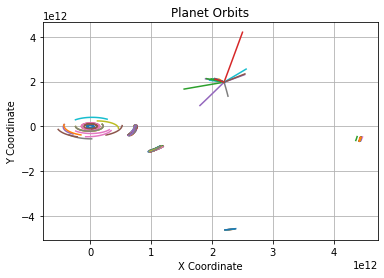

In [229]:
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

# Directory where the data files are located
data_directory = "createdData"

# Get a list of all .txt files in the directory
data_files = glob.glob(os.path.join(data_directory, "*.txt"))

# Extract planet names from file names
planets_to_load = [os.path.splitext(os.path.basename(file))[0] for file in data_files]

#planets_to_load = ["Sun","Mercury"]

#planets_to_load = [    
#    "Ariel",
#  "Umbriel",
#  "Titania",
#   "Oberon",
#  "Miranda",
# "Cordelia",
#  "Ophelia",
#   "Bianca",
# "Cressida",
#"Desdemona",
#   "Juliet",
#   "Portia",
# "Rosalind",
#  "Belinda",
#     "Puck",
#  "Caliban",
#  "Sycorax",
# "Prospero",
#  "Setebos",
# "Stephano",
# "Trinculo",
#"Francisco",
# "Margaret",
#"Ferdinand",
#  "Perdita",
#      "Mab",
#    "Cupid",
#    "Uranus"]

# Create a plot

plt.figure()
centerPlanet = "Sun"
Centerdata = np.genfromtxt(os.path.join(data_directory, centerPlanet + ".txt"), delimiter=',', usecols=(0,1, 2), names=["name","x", "y"])
i = 0
# Iterate through each planet and plot its data
for planet in planets_to_load:
    if planet != "Europa":
        print(planet)
        data = np.genfromtxt(os.path.join(data_directory, planet + ".txt"), delimiter=',', usecols=(0,1, 2), names=["name","x", "y"])
        plt.plot(data["x"]-Centerdata["x"], data["y"]-Centerdata["y"], label=planet)
        #data["name"] = planet


plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Planet Orbits")
plt.grid(True)
#plt.xlim([-5e11,5e11])
#plt.ylim([-5e11,5e11])
#plt.legend()

# Save the plot as an SVG file
plt.savefig("planet_orbits.svg", format="svg")

plt.show()



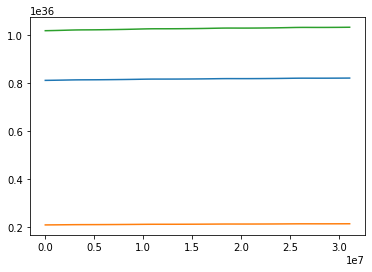

In [230]:
plt.figure()
EnergyData = np.genfromtxt("EnergyOverTime.txt",delimiter=",",usecols=(0,1,2,3),names=["time","PE", "KE","E"])
plt.plot(EnergyData["time"],EnergyData["PE"], label="PE")
plt.plot(EnergyData["time"],EnergyData["KE"], label="KE")
plt.plot(EnergyData["time"],EnergyData["E"], label="Energy")

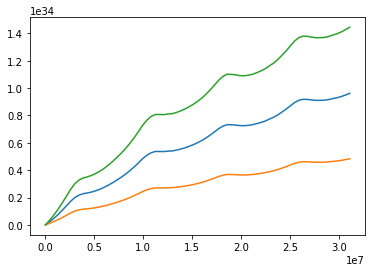

In [231]:
DPE = EnergyData["PE"] - EnergyData["PE"][0]
DKE = EnergyData["KE"] - EnergyData["KE"][0]
DE = EnergyData["E"] - EnergyData["E"][0]

plt.plot(EnergyData["time"],DPE, label="PE")
plt.plot(EnergyData["time"],DKE, label="KE")
plt.plot(EnergyData["time"],DE, label="Energy")

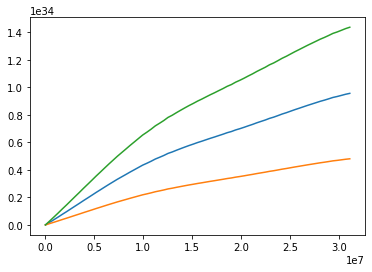

In [232]:
plt.figure()
#Now do it without Mecury :)
EnergyData = np.genfromtxt("EnergyOverTime.txt",delimiter=",",usecols=(0,4,5,6),names=["time","PE", "KE","E"])
#plt.plot(EnergyData["time"],EnergyData["PE"], label="PE")
#plt.plot(EnergyData["time"],EnergyData["KE"], label="KE")
#plt.plot(EnergyData["time"],EnergyData["E"], label="Energy")
DPE = EnergyData["PE"] - EnergyData["PE"][0]
DKE = EnergyData["KE"] - EnergyData["KE"][0]
DE = EnergyData["E"] - EnergyData["E"][0]

plt.plot(EnergyData["time"],DPE, label="PE")
plt.plot(EnergyData["time"],DKE, label="KE")
plt.plot(EnergyData["time"],DE, label="Energy")

(0.00035565588200778454, 1000.0)

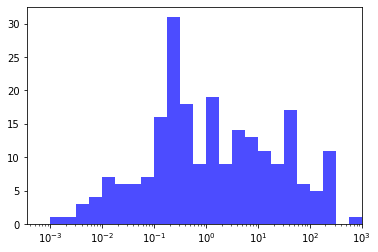

In [233]:
PosDiffData = np.genfromtxt("PlanetsEnd.txt",delimiter=",",usecols=(0,1,2),names=["planet","dr","percentOff"])
bins = np.logspace(-3,3,25)
np.insert(bins,0,0)
plt.hist(PosDiffData["percentOff"]*100, color='blue', alpha=0.7, bins=bins)
plt.xscale("log")
plt.xlim([bins[1]/5,bins[-1]])